# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Problem Statement

Here we will trying to predict the amount of money spent 

Metrics

Metrics used to measure performance of a model or result are clearly defined. Metrics are justified based on the characteristics of the problem.



In [153]:
!pip install seaborn
!pip install tqdm

In [1]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.1)
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import sys
!{sys.executable} -m pip install sklearn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
!pip install tpot

     |████████████████████████████████| 92kB 8.9MB/s eta 0:00:011
     |████████████████████████████████| 163kB 16.3MB/s eta 0:00:01
     |████████████████████████████████| 25.9MB 33.7MB/s eta 0:00:01
     |████████████████████████████████| 71kB 22.6MB/s eta 0:00:01
     |████████████████████████████████| 163kB 37.2MB/s eta 0:00:01
     |████████████████████████████████| 61kB 22.3MB/s eta 0:00:01
     |████████████████████████████████| 133kB 38.5MB/s eta 0:00:01
     |████████████████████████████████| 143kB 39.4MB/s eta 0:00:01
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=4d32f8826dfb558ad7962271c6a97440e59045ce899aad27be02499a59d8d668
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0
You should consider upgrading via the 'pip install --upgrade pip' 

In [1]:
import sklearn
sklearn.__version__

'0.23.1'

In [103]:
!pip install category_encoders

     |████████████████████████████████| 81kB 11.3MB/s eta 0:00:01
     |████████████████████████████████| 8.7MB 18.8MB/s eta 0:00:01
     |████████████████████████████████| 235kB 45.8MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import numpy as np
import math
import json
import pdb
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn import metrics
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
import shap 
pd.set_option('display.max_columns', 500)
%matplotlib inline
plt.rcParams.update({'font.size': 16})
import category_encoders as ce
import pdb
from tqdm import tqdm
from sklearn.experimental import enable_iterative_imputer  # noqa
#now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import MissingIndicator
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score


from tpot import TPOTRegressor

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Import data

In [3]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

Quick look on the data

In [4]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [5]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [6]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


There are 17000 people in the dataset.

In [7]:
transcript["person"].nunique()

17000

### Fix portfolio dataframe

Turn "duration" into hours instead of days as the "time of test start is in hours"

In [8]:
portfolio["duration"] = portfolio["duration"]*24

Function that checks which channel was used

In [9]:
def channels_fix(args):
    email, mobile, social, web = 0,0,0,0
    if "email" in args:
        email = 1
    if "mobile" in args:
        mobile = 1
    if "social" in args:
        social = 1
    if "web" in args:
        web = 1
    return email, mobile, social , web

Use above function and create new one hot encoded columns for the respective channel if it was used

In [10]:
portfolio["email"], portfolio["mobile"], portfolio["social"], portfolio["web"] = zip(*portfolio["channels"].apply(channels_fix))

In [11]:
portfolio.drop("channels", axis=1, inplace=True)

Check the number of rows in the different datasets

In [12]:
print(f"Portfolio rows: {len(portfolio)}")
print(f"Profile rows: {len(profile)}")
print(f"Transcript rows: {len(transcript)}")

Portfolio rows: 10
Profile rows: 17000
Transcript rows: 306534


In [13]:
portfolio.head()

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,168,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,120,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,96,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,168,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,240,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


Check if there are any missing values. THe profile dataset has missing values the others not

In [14]:
portfolio.isna().sum().sum()

0

In [15]:
profile.isna().sum().sum()

4350

In [16]:
transcript.isna().sum().sum()

0

There are ten different offers

In [17]:
portfolio["id"].nunique()

10

profile dataset has missing values for gender and income

In [18]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

There seems to be something off with the age column in profile. Have a look at the histogram below of for the age.

Text(0.5, 0, 'Age')

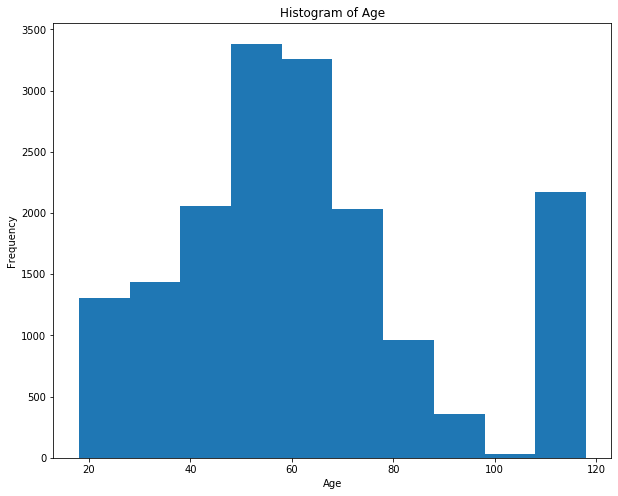

In [19]:
fig, ax = plt.subplots(1,1 ,figsize=(10,8))
profile["age"].plot.hist(ax=ax);
ax.set_title("Histogram of Age")
ax.set_xlabel("Age")

Here we can see that all the individuals with age 118 also have all the missing values. The qustion is if 118 is also an indiction of missing?

In [20]:
profile[profile["age"] == 118].isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

About 13% of the users in the profile dataset have missing values.

In [21]:
len(profile[profile["age"] == 118])/len(profile)*100

12.794117647058822

Plot the histogram without the age = 118 years

Text(0.5, 0, 'Age')

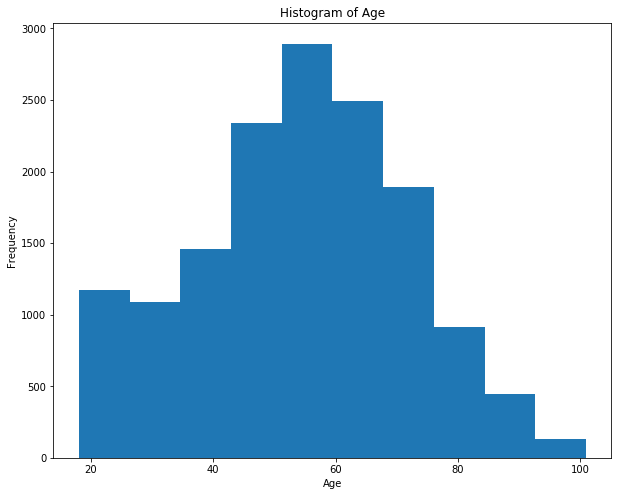

In [22]:

fig, ax = plt.subplots(1,1 ,figsize=(10,8))
profile[profile["age"] != 118]["age"].plot.hist(ax=ax);
ax.set_title("Histogram of Age")
ax.set_xlabel("Age")

Convert "became_member_on" to datetime object

In [23]:
profile["became_member_on"] = pd.to_datetime(profile["became_member_on"], format='%Y%m%d')

In [24]:
profile["member_days"] = (pd.datetime.now() - profile["became_member_on"])/np.timedelta64(1, 'D')
profile["member_days"] = profile["member_days"].astype("int")

In [25]:
profile.drop("became_member_on", axis=1, inplace=True)

Have a look at the first 5 rows

In [26]:
profile.head()

,gender,age,id,income,member_days
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,NaN,1236
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,1083
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,NaN,721
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1150
4,None,118,a03223e636434f42ac4c3df47e8bac43,NaN,1063


There seems to about the same distribution what year people became a member for both age==118 and age!=118

Gender distribution

In [27]:
profile["gender"].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

Income distribution

Text(0.5, 0, 'Income')

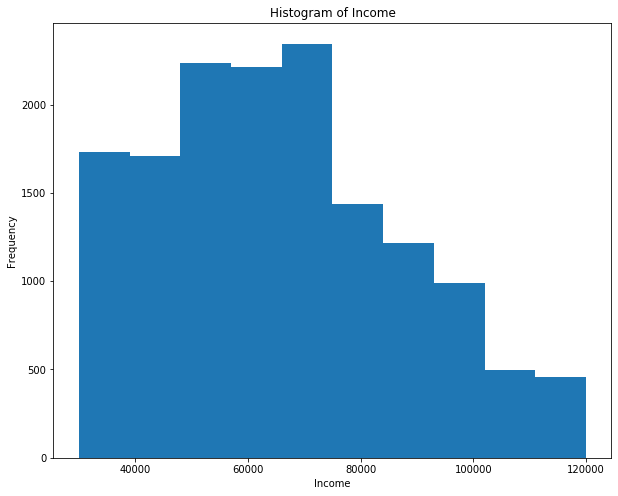

In [28]:

fig, ax = plt.subplots(1,1 ,figsize=(10,8))
profile["income"].plot.hist(ax=ax);
ax.set_title("Histogram of Income")
ax.set_xlabel("Income")

### Clean up transcript value column

In [29]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


The column "value" has dictionaries as data values.

In [30]:
transcript.iloc[0]["value"]["offer id"]

'9b98b8c7a33c4b65b9aebfe6a799e6d9'

How does the data look for a specific user

In [31]:
transcript[transcript["person"]=="78afa995795e4d85b5d9ceeca43f5fef"]

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
15561,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},6
47582,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.89},132
47583,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132
49502,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 17.78},144
53176,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168
85291,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},216
87134,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.67},222
92104,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 29.72},240
141566,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 23.93},378


Extract the relevant information from "value" column. There are two different keys, "offer id" and "offer_id" which complicaits things slightly. Need to fix this

In [32]:
transcript["offer id"] = transcript["value"].apply(lambda x: x.get("offer id"))

In [33]:
transcript["offer_id"] = transcript["value"].apply(lambda x: x.get("offer_id"))

In [34]:
transcript["amount"] = transcript["value"].apply(lambda x: x.get("amount"))

Set the values for the "offer_id" cplumn to the "offer id" column when it is missing

In [35]:
transcript.loc[transcript["offer id"].isna(), "offer id"] = transcript["offer_id"]

Drop the "offer_id" and "value" column as its redundant

In [36]:
transcript.drop("offer_id", axis=1, inplace=True)

In [37]:
transcript.drop("value", axis=1, inplace=True)

How is the missingness situation for the dataframe transcript.

In [38]:
transcript.isna().sum()

person           0
event            0
time             0
offer id    138953
amount      167581
dtype: int64

Just to make sure that there are no missing values when "offer id" is missing

In [39]:
transcript[transcript["offer id"].isna()]["amount"].isna().sum()

0

How does the data look for an individual

In [40]:
transcript[transcript["person"]=="78afa995795e4d85b5d9ceeca43f5fef"]#.head()

,person,event,time,offer id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
15561,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
47582,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,None,19.89
47583,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
49502,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,None,17.78
53176,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837,NaN
85291,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,216,5a8bc65990b245e5a138643cd4eb9837,NaN
87134,78afa995795e4d85b5d9ceeca43f5fef,transaction,222,None,19.67
92104,78afa995795e4d85b5d9ceeca43f5fef,transaction,240,None,29.72
141566,78afa995795e4d85b5d9ceeca43f5fef,transaction,378,None,23.93


In [41]:
portfolio

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,168,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,120,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,96,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,168,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,240,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,168,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,240,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,72,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,120,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,168,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


## Merge the dataframes

In [42]:
profile.isna().sum()

gender         2175
age               0
id                0
income         2175
member_days       0
dtype: int64

In [43]:
transcript.isna().sum()

person           0
event            0
time             0
offer id    138953
amount      167581
dtype: int64

In [44]:
portfolio.isna().sum()

reward        0
difficulty    0
duration      0
offer_type    0
id            0
email         0
mobile        0
social        0
web           0
dtype: int64

Merge transcript and profile with an inner join. Then join that dataframe with the portfolio with a left join.

In [45]:
df_all = transcript.merge(profile, left_on="person", right_on="id")
df_all = df_all.merge(portfolio, left_on="offer id", right_on="id", how="left") 
df_all.head()

,person,event,time,offer id,amount,gender,age,id_x,income,member_days,reward,difficulty,duration,offer_type,id_y,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1150,5.0,5.0,168.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1150,5.0,5.0,168.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,None,19.89,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1150,5.0,5.0,168.0,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,0.0,1.0
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,None,17.78,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Make sure we still have the same amount of rows

In [46]:
len(df_all)

306534

Make sure the missing data is correct

In [47]:
df_all.isna().sum()

person              0
event               0
time                0
offer id       138953
amount         167581
gender          33772
age                 0
id_x                0
income          33772
member_days         0
reward         138953
difficulty     138953
duration       138953
offer_type     138953
id_y           138953
email          138953
mobile         138953
social         138953
web            138953
dtype: int64

Drop all id columns as they are not needed

In [48]:
#df_all.drop(["person", "offer id", "id_x", "id_y"], axis=1, inplace=True)
df_all.drop(["id_x", "id_y"], axis=1, inplace=True)

In [49]:
df_all.head()

,person,event,time,offer id,amount,gender,age,income,member_days,reward,difficulty,duration,offer_type,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,100000.0,1150,5.0,5.0,168.0,bogo,1.0,1.0,0.0,1.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,100000.0,1150,5.0,5.0,168.0,bogo,1.0,1.0,0.0,1.0
2,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,None,19.89,F,75,100000.0,1150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,100000.0,1150,5.0,5.0,168.0,bogo,1.0,1.0,0.0,1.0
4,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,None,17.78,F,75,100000.0,1150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_all["amount"].nlargest(5)

37349     1062.28
242019    1015.73
43451     1001.85
95150      989.34
183866     977.78
Name: amount, dtype: float64

Dataframe to get loop later on started

In [51]:
test = df_all[(df_all["person"]=="a6fce370a2ce4df995fc4899bfeb3b6a") | (df_all["person"] =="94de646f7b6041228ca7dec82adb97d2")].copy()

#test

In [52]:
test.head()

,person,event,time,offer id,amount,gender,age,income,member_days,reward,difficulty,duration,offer_type,email,mobile,social,web
42990,94de646f7b6041228ca7dec82adb97d2,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d,NaN,M,27,33000.0,2349,5.0,5.0,120.0,bogo,1.0,1.0,1.0,1.0
42991,94de646f7b6041228ca7dec82adb97d2,offer viewed,6,f19421c1d4aa40978ebb69ca19b0e20d,NaN,M,27,33000.0,2349,5.0,5.0,120.0,bogo,1.0,1.0,1.0,1.0
42992,94de646f7b6041228ca7dec82adb97d2,transaction,30,None,7.41,M,27,33000.0,2349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42993,94de646f7b6041228ca7dec82adb97d2,offer completed,30,f19421c1d4aa40978ebb69ca19b0e20d,NaN,M,27,33000.0,2349,5.0,5.0,120.0,bogo,1.0,1.0,1.0,1.0
42994,94de646f7b6041228ca7dec82adb97d2,transaction,102,None,1.47,M,27,33000.0,2349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create new dataframe to use in as a lookup table looping through the dataset

In [53]:
offerid_lookup = portfolio.copy()
offerid_lookup["offer received"] = False
offerid_lookup["offer viewed"] = False
offerid_lookup["offer completed"] = False

In [54]:
offerid_lookup.head()

,reward,difficulty,duration,offer_type,id,email,mobile,social,web,offer received,offer viewed,offer completed
0,10,10,168,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,False,False,False
1,10,10,120,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,False,False,False
2,0,0,96,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,False,False,False
3,5,5,168,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,False,False,False
4,5,20,240,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,False,False,False


In [55]:
#offerid_lookup.loc[offerid_lookup["id"]=="ae264e3637204a6fb9bb56bc8210ddfd", "offer viewed"] =True
#offerid_lookup.loc[offerid_lookup["id"]=="9b98b8c7a33c4b65b9aebfe6a799e6d9", "offer viewed"] =True

In [75]:
#offerid_lookup[offerid_lookup["offer viewed"]==True].index.values.tolist()

### Loop for generating time specific features

In [76]:

offer_time = []
all_offer_ids = []
#offer_used_counter = 0
#number_of_offers = 0
#number_of_offers_viewed = 0
#offer_used = 0
#offer_active = False
#offer_viewed = False
#offer_used_viewed = 0
offer_diff_used_recieved = []
offer_diff_used_viewed = []
time_start = 0
all_trans_amounts = []
all_trans_times = []
offer_diff_trans_recieved = []
offer_diff_trans_viewed = []
prev_offer_viewed = []
prev_offer_difficulty = []
offer_time_viewed = []
offer_time_recieved = []
info_recieved_time = np.NaN
time_start_offer_recieved =np.NaN
info_time_array = []
offer_status = {}
offer_id = np.NaN
person_array = []
offer1, offer2, offer3, offer4, offer5, offer6, offer7, offer8, offer9, offer10 = [], [], [], [], [], [], [], [], [], []

#reset offerid_lookup table for each new person
offerid_lookup["offer received"] = False
offerid_lookup["offer viewed"] = False
offerid_lookup["offer completed"] = False

#just to get loop to start person!=row["person"]
person = df_all.reset_index(drop=True).loc[0, "person"]

df2 = pd.DataFrame()


#for index, row in test.reset_index(drop=True).iterrows():
for index, row in tqdm(df_all.iterrows(), total=len(df_all)):    
    #check if we are on a new person, if so reset all variables
    if (person != row["person"]) | (index+1 == len(df_all)):
        person = row["person"]
        #save values
        df = pd.DataFrame({"person_array":person_array, "trans_time":all_trans_times, "trans_amount":all_trans_amounts, 
                           "offer_time_recieved":offer_time_recieved, "offer_viewed_time": offer_time_viewed, 
                           "all_offer_ids":all_offer_ids, "cur_offer_viewed":prev_offer_viewed,
                   "offer_diff_trans_viewed": offer_diff_trans_viewed, "cur_offer_difficulty":prev_offer_difficulty, 
                   "info_time_array":info_time_array, "offer1":offer1, "offer2":offer2, "offer3":offer3, "offer4":offer4, 
                           "offer5":offer5, "offer6":offer6, "offer7":offer7, "offer8":offer8, "offer9":offer9, "offer10":offer10})
        df["offer_used"] = np.where(df["trans_amount"] >= df["cur_offer_difficulty"], True, False)
        df.loc[df["cur_offer_viewed"]==False, "offer_used"] = False
        df["time_last_trans"] = df["trans_time"].diff()
        df2 = pd.concat([df2, df])
        #reset values
        offer_time = []
        all_offer_ids = []
        #offer_used_counter = 0
        #number_of_offers = 0
        #number_of_offers_viewed = 0
        #offer_used = 0
        #offer_active = False
        #offer_viewed = False
        #offer_used_viewed = 0
        offer_diff_used_recieved = []
        offer_diff_used_viewed = []
        time_start = 0
        all_trans_amounts = []
        all_trans_times = []
        offer_diff_trans_recieved = []
        offer_diff_trans_viewed = []
        prev_offer_viewed = []
        prev_offer_difficulty = []
        offer_time_viewed = []
        offer_time_recieved = []
        info_recieved_time = np.NaN
        time_start_offer_recieved =np.NaN
        info_time_array = []
        offer_status = {}
        offer_id = np.NaN
        person_array = []
        offer1, offer2, offer3, offer4, offer5, offer6, offer7, offer8, offer9, offer10 = [], [], [], [], [], [], [], [], [], []
        #reset offerid_lookup table for each new person
        offerid_lookup["offer received"] = False
        offerid_lookup["offer viewed"] = False
        offerid_lookup["offer completed"] = False

    if row["event"] == "offer received":
        time_start_offer_recieved = row["time"]
        difficulty = row["difficulty"] # offer requirement
        offer_id = row["offer id"]
        offerid_lookup.loc[offerid_lookup["id"]==offer_id, "offer received"] = True
        offerid_lookup.loc[offerid_lookup["id"]==offer_id, "offer viewed"] = False
        offerid_lookup.loc[offerid_lookup["id"]==offer_id, "offer completed"] = False
                
    elif row["event"] == "offer viewed":
        time_start_offer_viewed = row["time"]    
        time_diff = time_start_offer_viewed - time_start_offer_recieved
        offerid_lookup.loc[offerid_lookup["id"]==row["offer id"], "offer viewed"] = True
            
    elif row["event"] == "offer completed":
        time_offer_completed = row["time"]
        time_diff = time_offer_completed - time_start_offer_recieved
        offer_time.append(time_diff)
        offer_id = row["offer id"]
        offerid_lookup.loc[offerid_lookup["id"]==offer_id, "offer received"] = False
        offerid_lookup.loc[offerid_lookup["id"]==offer_id, "offer viewed"] = False
        offerid_lookup.loc[offerid_lookup["id"]==offer_id, "offer completed"] = True      
        
    elif row["event"] == "transaction":
        all_trans_amounts.append(row["amount"])
        all_trans_times.append(row["time"])
        all_offer_ids.append(offer_id)
        person_array.append(person)
        
        for offer in offerid_lookup[offerid_lookup["offer viewed"]==True].index.values.tolist():
            eval("offer"+str(offer+1)).append(True)
        for offer in offerid_lookup[offerid_lookup["offer viewed"]==False].index.values.tolist():
            eval("offer"+str(offer+1)).append(False)
    
        #get difficulty value
        crit1 = offerid_lookup["offer viewed"] == True
        crit2 = offerid_lookup["offer_type"] != "informational"
        amount_threshold = offerid_lookup.loc[crit1 & crit2, "difficulty"].values
        
        #Setting time when offer informational
        #crit1 = offerid_lookup["offer viewed"] == True
        crit3 = offerid_lookup["offer_type"] == "informational"
        info_offer_df = offerid_lookup.loc[crit1 & crit3]
        if len(info_offer_df) > 0:
            info_recieved_time = time_start_offer_viewed
            offerid_lookup.loc[offerid_lookup["id"]==row["offer id"], "offer viewed"] = False   #this doesnt work, need to be fixed?
            
        info_time_array.append(info_recieved_time)
        offer_time_recieved.append(time_start_offer_recieved)
        
        if len(amount_threshold) > 0: #if offerviewed and not informational
            prev_offer_viewed.append(True)
            prev_offer_difficulty.append(amount_threshold[0])
            time_diff_recieved_use = row["time"] - time_start_offer_recieved #measure the time between offer use and recieved
            time_diff_viewed_use = row["time"] - time_start_offer_viewed #measure the time between offer use and viewed 
            offer_diff_trans_recieved.append(time_diff_recieved_use)
            offer_diff_trans_viewed.append(time_diff_viewed_use)
            offer_time_viewed.append(time_start_offer_viewed)
            
            if (row["amount"] >= amount_threshold).any(): #if offer used
                time_diff_recieved_use = row["time"] - time_start_offer_recieved #measure the time between offer use and recieved
                time_diff_viewed_use = row["time"] - time_start_offer_viewed #measure the time between offer use and viewed 
                offer_diff_used_recieved.append(time_diff_recieved_use)
                offer_diff_used_viewed.append(time_diff_viewed_use)

        else:           
            prev_offer_viewed.append(False)
            prev_offer_difficulty.append(0)
            offer_diff_trans_viewed.append(np.NaN)
            offer_time_viewed.append(np.NaN)

100%|██████████| 306534/306534 [29:57<00:00, 170.51it/s]


In [78]:
df2.head()

,person_array,trans_time,trans_amount,offer_time_recieved,offer_viewed_time,all_offer_ids,cur_offer_viewed,offer_diff_trans_viewed,cur_offer_difficulty,info_time_array,offer1,offer2,offer3,offer4,offer5,offer6,offer7,offer8,offer9,offer10,offer_used,time_last_trans
0,78afa995795e4d85b5d9ceeca43f5fef,132.0,19.89,0.0,6.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,126.0,5.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True,NaN
1,78afa995795e4d85b5d9ceeca43f5fef,144.0,17.78,0.0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,12.0
2,78afa995795e4d85b5d9ceeca43f5fef,222.0,19.67,168.0,NaN,5a8bc65990b245e5a138643cd4eb9837,0.0,NaN,0.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False,78.0
3,78afa995795e4d85b5d9ceeca43f5fef,240.0,29.72,168.0,NaN,5a8bc65990b245e5a138643cd4eb9837,0.0,NaN,0.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False,18.0
4,78afa995795e4d85b5d9ceeca43f5fef,378.0,23.93,168.0,NaN,5a8bc65990b245e5a138643cd4eb9837,0.0,NaN,0.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False,138.0


Save the above loop run to file as it takes a while to run and just import this file to avoid running the loop again.

In [80]:
#df2.to_csv("df2.csv")

Import loop data

In [56]:
df2 = pd.read_csv("df2.csv")

In [57]:
profile.head()

,gender,age,id,income,member_days
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,NaN,1236
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,1083
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,NaN,721
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1150
4,None,118,a03223e636434f42ac4c3df47e8bac43,NaN,1063


In [58]:
transcript.head()

,person,event,time,offer id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [59]:
portfolio.head()

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,168,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,120,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,96,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,168,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,240,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


In [85]:
df2.drop("Unnamed: 0", axis=1, inplace=True)
df2.head(20)

,person_array,trans_time,trans_amount,offer_time_recieved,offer_viewed_time,all_offer_ids,cur_offer_viewed,offer_diff_trans_viewed,cur_offer_difficulty,info_time_array,offer1,offer2,offer3,offer4,offer5,offer6,offer7,offer8,offer9,offer10,offer_used,time_last_trans
0,78afa995795e4d85b5d9ceeca43f5fef,132.0,19.89,0.0,6.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,126.0,5.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True,NaN
1,78afa995795e4d85b5d9ceeca43f5fef,144.0,17.78,0.0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,12.0
2,78afa995795e4d85b5d9ceeca43f5fef,222.0,19.67,168.0,NaN,5a8bc65990b245e5a138643cd4eb9837,0.0,NaN,0.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False,78.0
3,78afa995795e4d85b5d9ceeca43f5fef,240.0,29.72,168.0,NaN,5a8bc65990b245e5a138643cd4eb9837,0.0,NaN,0.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False,18.0
4,78afa995795e4d85b5d9ceeca43f5fef,378.0,23.93,168.0,NaN,5a8bc65990b245e5a138643cd4eb9837,0.0,NaN,0.0,216.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False,138.0
5,78afa995795e4d85b5d9ceeca43f5fef,510.0,21.72,504.0,408.0,f19421c1d4aa40978ebb69ca19b0e20d,1.0,102.0,10.0,408.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,True,132.0
6,78afa995795e4d85b5d9ceeca43f5fef,534.0,26.56,504.0,NaN,f19421c1d4aa40978ebb69ca19b0e20d,0.0,NaN,0.0,408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False,24.0
7,a03223e636434f42ac4c3df47e8bac43,234.0,1.09,0.0,6.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,228.0,20.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,NaN
8,a03223e636434f42ac4c3df47e8bac43,264.0,3.50,0.0,6.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,258.0,20.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,30.0
9,a03223e636434f42ac4c3df47e8bac43,612.0,0.06,576.0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,NaN,0.0,336.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,348.0


In [86]:
df_trans_prof = pd.merge(df2, profile, left_on="person_array", right_on="id")
df_trans_prof_port = df_trans_prof.merge(portfolio, left_on="all_offer_ids", right_on="id")
#df_trans_prof_port.drop(["person_array", "all_offer_ids", "id_x", "id_y", "cur_offer_difficulty"], inplace=True, axis=1)
#df_trans_prof.drop(["person_array", "all_offer_ids", "id", "cur_offer_difficulty","offer_used", "offer_time_recieved", "offer_viewed_time", "cur_offer_viewed", "offer_diff_trans_viewed", "info_time_array", "trans_time", "time_last_trans"], inplace=True, axis=1)
#df_trans_prof_port.drop(["Unnamed: 0", "person_array", "all_offer_ids", "id_x", "id_y"], inplace=True, axis=1)
df_trans_prof_port.drop(["person_array", "all_offer_ids", "id_x", "id_y"], inplace=True, axis=1)

In [87]:
df_trans_prof_port.head()

,trans_time,trans_amount,offer_time_recieved,offer_viewed_time,cur_offer_viewed,offer_diff_trans_viewed,cur_offer_difficulty,info_time_array,offer1,offer2,offer3,offer4,offer5,offer6,offer7,offer8,offer9,offer10,offer_used,time_last_trans,gender,age,income,member_days,reward,difficulty,duration,offer_type,email,mobile,social,web
0,132.0,19.89,0.0,6.0,1.0,126.0,5.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True,NaN,F,75,100000.0,1150,5,5,168,bogo,1,1,0,1
1,144.0,17.78,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,12.0,F,75,100000.0,1150,5,5,168,bogo,1,1,0,1
2,654.0,0.05,504.0,648.0,1.0,6.0,10.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,False,300.0,None,118,NaN,1004,5,5,168,bogo,1,1,0,1
3,498.0,15.63,408.0,438.0,1.0,60.0,5.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,True,438.0,M,65,53000.0,874,5,5,168,bogo,1,1,0,1
4,180.0,2.68,168.0,174.0,1.0,6.0,5.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,36.0,None,118,NaN,1190,5,5,168,bogo,1,1,0,1


In [88]:
df_trans_prof_port["offer_used"] = df_trans_prof_port["offer_used"].astype("int")

In [89]:
df_trans_prof_port = pd.get_dummies(df_trans_prof_port, columns=["offer_type"])

In [90]:
df_trans_prof_port.shape

(134146, 34)

In [91]:
df_trans_prof = df_trans_prof_port

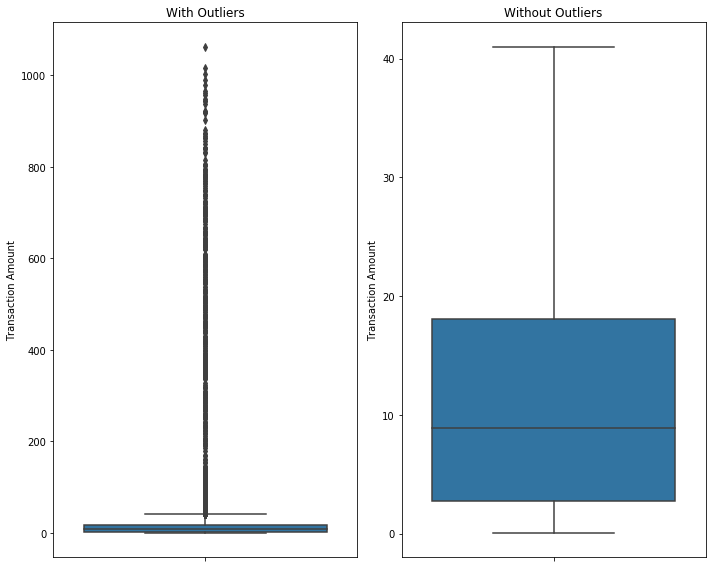

In [92]:
fig, ax = plt.subplots(1,2, figsize=(10,8))
sns.boxplot(y=df_trans_prof["trans_amount"], ax=ax[0])
sns.boxplot(y=df_trans_prof["trans_amount"], showfliers=False, ax=ax[1])
ax[0].set_ylabel("Transaction Amount")
ax[1].set_ylabel("Transaction Amount")
ax[0].set_title("With Outliers")
ax[1].set_title("Without Outliers")
plt.tight_layout()

Text(0, 0.5, 'Log(trans_amount)')

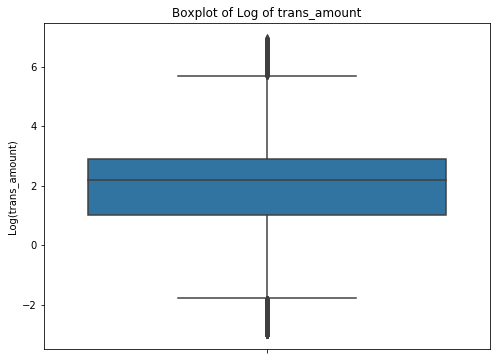

In [93]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
sns.boxplot(y=np.log(df_trans_prof["trans_amount"]), ax=ax)
ax.set_title("Boxplot of Log of trans_amount")
ax.set_ylabel("Log(trans_amount)")

In [94]:
df_trans_prof[df_trans_prof["trans_amount"] > 100]

,trans_time,trans_amount,offer_time_recieved,offer_viewed_time,cur_offer_viewed,offer_diff_trans_viewed,cur_offer_difficulty,info_time_array,offer1,offer2,offer3,offer4,offer5,offer6,offer7,offer8,offer9,offer10,offer_used,time_last_trans,gender,age,income,member_days,reward,difficulty,duration,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational
537,618.0,437.11,576.0,588.0,1.0,30.0,5.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,150.0,F,73,75000.0,737,5,5,168,1,1,0,1,1,0,0
583,588.0,920.01,504.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,138.0,M,59,86000.0,1723,5,5,168,1,1,0,1,1,0,0
783,216.0,762.70,168.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30.0,F,53,84000.0,1025,5,5,168,1,1,0,1,1,0,0
1181,684.0,104.85,576.0,504.0,1.0,180.0,7.0,504.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,84.0,M,76,55000.0,1046,5,5,168,1,1,0,1,1,0,0
1840,606.0,575.03,504.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,60.0,F,64,73000.0,1396,5,5,168,1,1,0,1,1,0,0
1884,36.0,400.74,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12.0,F,81,57000.0,1008,5,5,168,1,1,0,1,1,0,0
1963,456.0,377.19,408.0,420.0,1.0,36.0,10.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,30.0,F,21,36000.0,1510,5,5,168,1,1,0,1,1,0,0
3102,552.0,740.31,504.0,522.0,1.0,30.0,10.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,30.0,M,39,91000.0,1765,5,5,168,1,1,0,1,1,0,0
3458,78.0,105.24,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,42.0,M,74,68000.0,1945,5,5,168,1,1,0,1,1,0,0
3537,522.0,460.55,504.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,78.0,F,82,62000.0,1382,5,5,168,1,1,0,1,1,0,0


In [95]:
df_trans_prof["trans_amount"].describe()

count    134146.000000
mean         12.792514
std          30.345502
min           0.050000
25%           2.780000
50%           8.880000
75%          18.070000
max        1062.280000
Name: trans_amount, dtype: float64

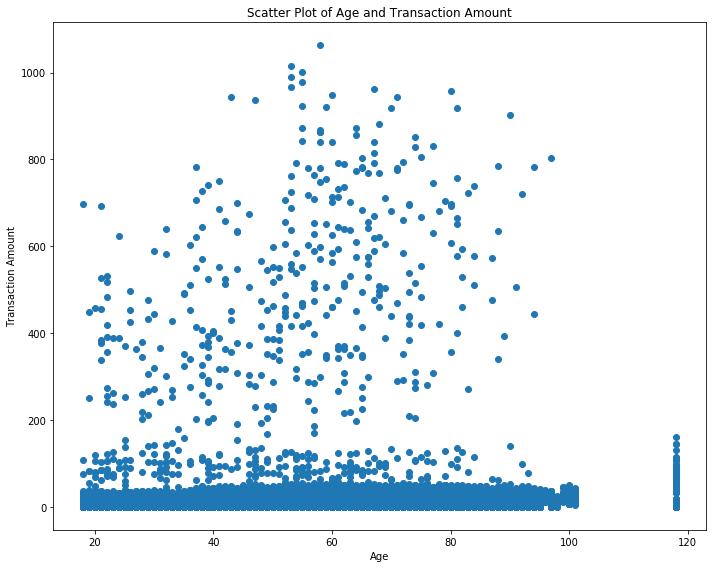

In [96]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
plt.scatter(df_trans_prof["age"], df_trans_prof["trans_amount"])
ax.set_xlabel("Age")
ax.set_ylabel("Transaction Amount")
ax.set_title("Scatter Plot of Age and Transaction Amount")
plt.tight_layout()

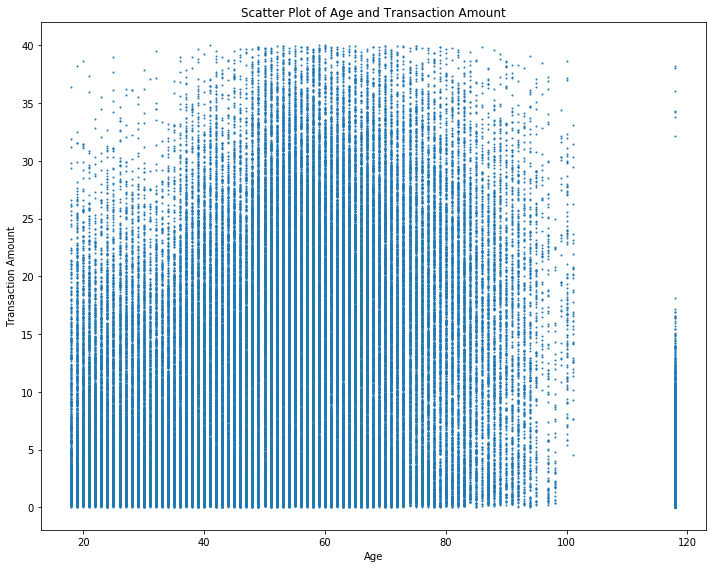

In [72]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
plt.scatter(df_trans_prof[df_trans_prof["trans_amount"]<40]["age"], df_trans_prof[df_trans_prof["trans_amount"]<40]["trans_amount"], s=1)
ax.set_xlabel("Age")
ax.set_ylabel("Transaction Amount")
ax.set_title("Scatter Plot of Age and Transaction Amount")
plt.tight_layout()

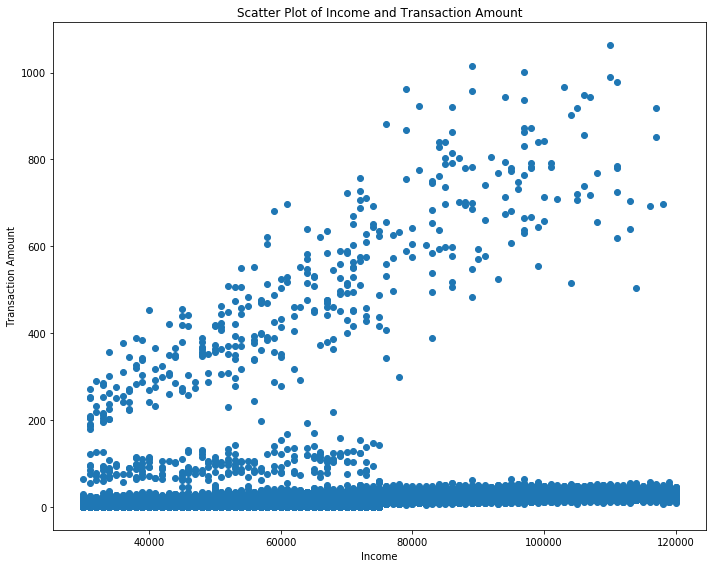

In [73]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
plt.scatter(df_trans_prof["income"], df_trans_prof["trans_amount"])
ax.set_xlabel("Income")
ax.set_ylabel("Transaction Amount")
ax.set_title("Scatter Plot of Income and Transaction Amount")
plt.tight_layout()

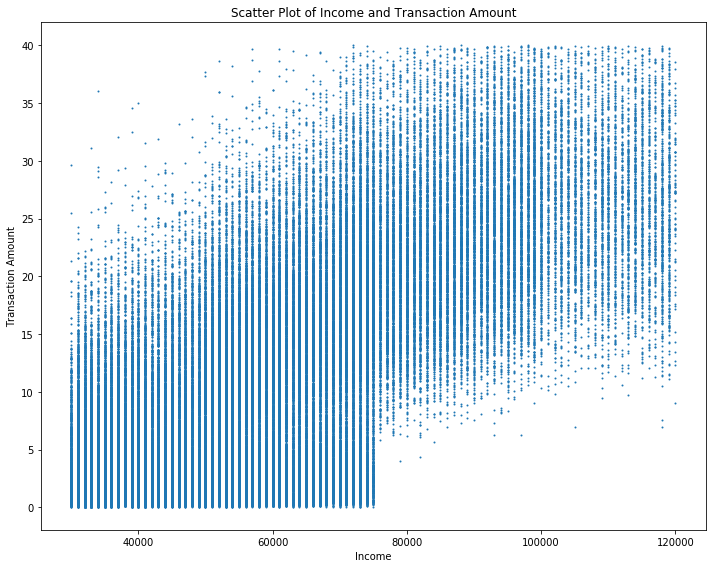

In [74]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
plt.scatter(df_trans_prof[df_trans_prof["trans_amount"]<40]["income"], df_trans_prof[df_trans_prof["trans_amount"]<40]["trans_amount"], s=1)
ax.set_xlabel("Income")
ax.set_ylabel("Transaction Amount")
ax.set_title("Scatter Plot of Income and Transaction Amount")
plt.tight_layout()

In [75]:
df2.isna().sum()

Unnamed: 0                     0
person_array                   0
trans_time                     0
trans_amount                   0
offer_time_recieved         4806
offer_viewed_time          58240
all_offer_ids               4806
cur_offer_viewed               0
offer_diff_trans_viewed    58240
cur_offer_difficulty           0
info_time_array            98880
offer1                         0
offer2                         0
offer3                         0
offer4                         0
offer5                         0
offer6                         0
offer7                         0
offer8                         0
offer9                         0
offer10                        0
offer_used                     0
time_last_trans            16577
dtype: int64

In [76]:
df_trans_prof.isna().sum()

Unnamed: 0                      0
trans_time                      0
trans_amount                    0
offer_time_recieved             0
offer_viewed_time           53434
cur_offer_viewed                0
offer_diff_trans_viewed     53434
cur_offer_difficulty            0
info_time_array             94074
offer1                          0
offer2                          0
offer3                          0
offer4                          0
offer5                          0
offer6                          0
offer7                          0
offer8                          0
offer9                          0
offer10                         0
offer_used                      0
time_last_trans             13977
gender                      14464
age                             0
income                      14464
member_days                     0
reward                          0
difficulty                      0
duration                        0
email                           0
mobile        

In [97]:
df_trans_prof = df_trans_prof_port

In [98]:
df_trans_prof.fillna(0, inplace=True)

In [99]:
for col in df_trans_prof.columns:
    if "offer" in col and "_" not in col:
        df_trans_prof[col] = df_trans_prof[col].astype("int")

Add feature if gender is missing.
Fill missing with mode.
Get dummes from gender.

In [100]:
df_trans_prof["gender_missing"] = np.where(df_trans_prof["gender"].isna(), 1, 0)
df_trans_prof["gender"] = df_trans_prof["gender"].fillna(df_trans_prof["gender"].mode())
df_trans_prof = pd.get_dummies(df_trans_prof,columns=["gender"])

Add feature for age missing, fill with median values

In [101]:
df_trans_prof["age_missing"] = np.where(df_trans_prof["age"].isna(), 1, 0)
df_trans_prof["age"] = df_trans_prof["age"].fillna(df_trans_prof["age"].median())

Income missing add feature and fillna with median.

In [102]:
df_trans_prof["income_missing"] = np.where(df_trans_prof["income"].isna(), 1, 0)
df_trans_prof["income"] = df_trans_prof["income"].fillna(df_trans_prof["income"].median())

## Outliers removal and detection of trans_amount
Look foroutliers for trans_amount with Tukey rule
Got really bad results regarding RMSE if we didnt remove the outliers

In [103]:
#df_trans_prof = df_trans_prof[df_trans_prof["trans_amount"]<100]
df_trans_prof["trans_amount"] = np.log(df_trans_prof["trans_amount"])
Q1,Q3 = np.percentile(df_trans_prof["trans_amount"], [25, 75])
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
crit1 = df_trans_prof["trans_amount"] > lower_range
crit2 = df_trans_prof["trans_amount"] < upper_range

New dataframe with outliers for trans_amount removed

In [104]:
df_trans_prof = df_trans_prof[crit1 & crit2]

Remove age == 118 rows

In [93]:
#df_trans_prof.drop(df_trans_prof[df_trans_prof["age"]==118].index, inplace=True, axis=0)

In [115]:
#df_trans_prof.drop("Unnamed: 0", axis=1, inplace=True)

In [100]:
df_temp = df_trans_prof.sample(n=15000, random_state=42)
X = df_temp.drop("trans_amount", axis=1)
y = df_temp["trans_amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [84]:
!pip install hyperopt

You should consider upgrading via the 'pip install --upgrade pip' command.


In [97]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

## Hyperopt
Tried to run hyperopt on the random forest hyperparameters. However, the alogrihtm seems to crash when I give too much input data. Around 6400 rows are ok however when I go up to about 12000 rows it seems to get stuck at the second iteration.

In [101]:

def ml_model(params):
    rgr = RandomForestRegressor(**params, random_state=42, n_jobs=-1)
    #return cross_val_score(clf, X_train[:100], y_train[:100]).mean()
    print("Train model")
    print(params)
    rgr.fit(X_train, y_train)
    y_pred_train = rgr.predict(X_train)
    y_pred = rgr.predict(X_test)
    print(f"train_R2: {metrics.r2_score(y_train, y_pred_train)}")
    return metrics.r2_score(y_test, y_pred)

param_space = {
    'max_depth': hp.choice('max_depth', range(2, 20)), #1,20
    #'max_features': hp.choice('max_features', range(1,150)),
    'n_estimators': hp.choice('n_estimators', range(10, 500)), #1,500
    'criterion': hp.choice('criterion', ["mse", "mae"]),
    "min_samples_split": hp.choice("min_samples_split", range(2, 10)),#20)),
    "max_features": hp.choice("max_features", ["auto", "sqrt", "log2"]),
    "min_samples_leaf": hp.choice("min_samples_leaf", range(1, 4))}#10))}#,
    #"max_leaf_nodes": hp.choice("max_leaf_nodes", range(1, 10000))}#,
    ##"max_samples": hp.choice("max_samples", range(1,10000))}

best = 0
accuracy = []
params_list = []
def fuction_to_minimize(params):
    global best
    result = ml_model(params)
    accuracy.append(result)
    params_list.append(params)
    if result > best:
        best = result
    print ('new best:', best, params)
    return {'loss': -result, 'status': STATUS_OK}

trials = Trials()
best = fmin(fuction_to_minimize, param_space, algo=tpe.suggest, max_evals=10, trials=trials)
print ('best:')
print (best)

Train model                                           
{'criterion': 'mse', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 384}
train_R2: 0.4190732104704423                          
new best:                                             
0.42438984534375024                                   
{'criterion': 'mse', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 384}
Train model                                                                       
{'criterion': 'mae', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 428}
train_R2: 0.5722334748506166                                                      
new best:                                                                         
0.5752934342878946                                                                
{'criterion': 'mae', 'max_depth': 4, 'max_features': 'auto', 

## TPOT Auto ML Test

In [85]:
X = df_trans_prof.sample(n=15000, random_state=42).drop("trans_amount", axis=1)
y = df_trans_prof.sample(n=15000, random_state=42)["trans_amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Running TPOT on a smaller part of the dataset

In [96]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_pipeline.py')


Generation 1 - Current best internal CV score: -0.5223796300440166
Generation 2 - Current best internal CV score: -0.5223438075942578
Generation 3 - Current best internal CV score: -0.5223438075942578
Generation 4 - Current best internal CV score: -0.5223438075942578
Generation 5 - Current best internal CV score: -0.521943634128902
Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.35000000000000003, min_samples_leaf=3, min_samples_split=18, n_estimators=100)
-0.5220246989938766


Import trained TPOT that was trained on and tested on 15000 samples

In [91]:
import tpot_pipeline

Save the optimum TPOT model from the imported file as the variable tpot

In [94]:
tpot = tpot_pipeline.exported_pipeline.fit(X_train, y_train)

In [95]:
y_train_predict = tpot.predict(X_train)
y_test_predict = tpot.predict(X_test)
rmse_train = metrics.mean_squared_error(y_train, y_train_predict)
rmse_test = metrics.mean_squared_error(y_test, y_test_predict)
r2_train = metrics.r2_score(y_train, y_train_predict)
r2_test = metrics.r2_score(y_test, y_test_predict)
print(f"rmse_train: {rmse_train}, rmse_test: {rmse_test}, r2_train: {r2_train}, r2_test: {r2_test}")

rmse_train: 0.3170995368782355, rmse_test: 0.5220246989938766, r2_train: 0.7795579782507364, r2_test: 0.6377991207459727


With 4000 Values

In [94]:
y_train_predict = tpot.predict(X_train)
y_test_predict = tpot.predict(X_test)
rmse_train = metrics.mean_squared_error(y_train, y_train_predict)
rmse_test = metrics.mean_squared_error(y_test, y_test_predict)
r2_train = metrics.r2_score(y_train, y_train_predict)
r2_test = metrics.r2_score(y_test, y_test_predict)
print(f"rmse_train: {rmse_train}, rmse_test: {rmse_test}, r2_train: {r2_train}, r2_test: {r2_test}")

rmse_train: 0.3950489110559963, rmse_test: 0.5301263873993275, r2_train: 0.719803904325228, r2_test: 0.625453468272602


### Run random forest model

In [116]:
df_trans_prof.head()

,trans_time,trans_amount,offer_time_recieved,offer_viewed_time,cur_offer_viewed,offer_diff_trans_viewed,cur_offer_difficulty,info_time_array,offer1,offer2,offer3,offer4,offer5,offer6,offer7,offer8,offer9,offer10,offer_used,time_last_trans,age,became_member_on,income,reward,difficulty,duration,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,gender_missing,gender_0,gender_F,gender_M,gender_O,age_missing,income_missing
0,132.0,2.990217,0.0,6.0,1.0,126.0,5.0,0.0,0,0,0,1,0,0,0,0,0,0,1,0.0,75,20170509,100000.0,5,5,168,1,1,0,1,1,0,0,0,0,1,0,0,0,0
1,144.0,2.878074,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,12.0,75,20170509,100000.0,5,5,168,1,1,0,1,1,0,0,0,0,1,0,0,0,0
3,498.0,2.749192,408.0,438.0,1.0,60.0,5.0,0.0,0,0,0,1,0,0,0,0,0,1,1,438.0,65,20180209,53000.0,5,5,168,1,1,0,1,1,0,0,0,0,0,1,0,0,0
4,180.0,0.985817,168.0,174.0,1.0,6.0,5.0,0.0,0,0,0,1,0,0,0,0,0,0,0,36.0,118,20170330,0.0,5,5,168,1,1,0,1,1,0,0,0,1,0,0,0,0,0
5,186.0,0.900161,168.0,174.0,1.0,12.0,5.0,0.0,0,0,0,1,0,0,0,0,0,0,0,6.0,118,20170330,0.0,5,5,168,1,1,0,1,1,0,0,0,1,0,0,0,0,0


In [105]:
X = df_trans_prof.drop("trans_amount", axis=1)
y = df_trans_prof["trans_amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [106]:
%%time
rfr = RandomForestRegressor(n_estimators=100,random_state=42, min_samples_split=2, max_depth=None) #250
rfr.fit(X_train, y_train)

CPU times: user 1min 14s, sys: 397 ms, total: 1min 14s
Wall time: 1min 14s


RandomForestRegressor(random_state=42)

In [119]:
y_train_predict = rfr.predict(X_train)
y_test_predict = rfr.predict(X_test)

In [120]:
rmse_train = metrics.mean_squared_error(y_train, y_train_predict)
rmse_test = metrics.mean_squared_error(y_test, y_test_predict)
r2_train = metrics.r2_score(y_train, y_train_predict)
r2_test = metrics.r2_score(y_test, y_test_predict)

Plot the absolute differnce between predicted and truth

[<matplotlib.lines.Line2D at 0x7fdc04a1d940>]

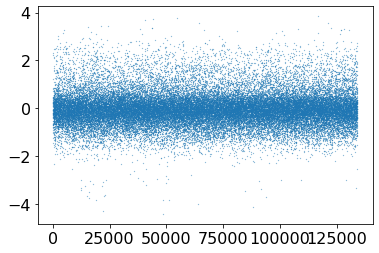

In [121]:
diff = y_test_predict - y_test
plt.plot(diff, linestyle = 'None', marker='o', markersize=0.2)

min_samples_split=2 instead of 2, max_depth=None instead of None, n_est=250

In [122]:
print(f"rmse_train: {rmse_train}, rmse_test: {rmse_test}, r2_train: {r2_train}, r2_test: {r2_test}")

rmse_train: 0.0689570394408003, rmse_test: 0.4879094849414089, r2_train: 0.9530641627437482, r2_test: 0.6623084783110817


min_samples_split=2 instead of 2, max_depth=10 instead of None, n_est=250

In [172]:
print(f"rmse_train: {rmse_train}, rmse_test: {rmse_test}, r2_train: {r2_train}, r2_test: {r2_test}")

rmse_train: 0.4848018529702606, rmse_test: 0.5048835456364164, r2_train: 0.6700180132867174, r2_test: 0.650560405026494


min_samples_split=2 instead of 2, max_depth=10 instead of None, n_est=250, remove age=118 rows

In [142]:
print(f"rmse_train: {rmse_train}, rmse_test: {rmse_test}, r2_train: {r2_train}, r2_test: {r2_test}")

rmse_train: 521.8174832682178, rmse_test: 1059.4114163784482, r2_train: 0.4616212577415809, r2_test: 0.04191204126775028


min_samples_split=2 instead of 2, max_depth=10 instead of None, n_est=250, keep outliers

In [130]:
print(f"rmse_train: {rmse_train}, rmse_test: {rmse_test}, r2_train: {r2_train}, r2_test: {r2_test}")

rmse_train: 518.4338854074578, rmse_test: 884.3634474333061, r2_train: 0.43260324023040175, r2_test: 0.054502456530012955


min_samples_split=2 instead of 2, max_depth=10 instead of None, n_est=250

In [104]:
print(f"rmse_train: {rmse_train}, rmse_test: {rmse_test}, r2_train: {r2_train}, r2_test: {r2_test}")

rmse_train: 0.4848018529702606, rmse_test: 0.5048835456364164, r2_train: 0.6700180132867174, r2_test: 0.650560405026494


min_samples_split=4 instead of 2, max_depth=10 instead of None, n_est=250

In [100]:
print(f"rmse_train: {rmse_train}, rmse_test: {rmse_test}, r2_train: {r2_train}, r2_test: {r2_test}")

rmse_train: 0.4852249585823746, rmse_test: 0.504901470941137, r2_train: 0.6697300250506587, r2_test: 0.6505479985789567


min_samples_split=4 instead of 2, max_depth=8 instead of None, n_est=250

In [96]:
print(f"rmse_train: {rmse_train}, rmse_test: {rmse_test}, r2_train: {r2_train}, r2_test: {r2_test}")

rmse_train: 0.5284087432150573, rmse_test: 0.5228781257173769, r2_train: 0.6403368390312866, r2_test: 0.6381060106823825


min_samples_split=4 instead of 2, max_depth=8 instead of None, n_est=500

In [91]:
print(f"rmse_train: {rmse_train}, rmse_test: {rmse_test}, r2_train: {r2_train}, r2_test: {r2_test}")

rmse_train: 0.5284825459431611, rmse_test: 0.5229861707801806, r2_train: 0.6402866049599947, r2_test: 0.6380312306201061


min_samples_split=4 instead of 2

In [190]:
print(f"rmse_train: {rmse_train}, rmse_test: {rmse_test}, r2_train: {r2_train}, r2_test: {r2_test}")

rmse_train: 0.09017558599839502, rmse_test: 0.4814216190401374, r2_train: 0.9386216887611397, r2_test: 0.6667988548590538


More feautres

In [186]:
print(f"rmse_train: {rmse_train}, rmse_test: {rmse_test}, r2_train: {r2_train}, r2_test: {r2_test}")

rmse_train: 0.06662627165747466, rmse_test: 0.48439126951599115, r2_train: 0.954650607554132, r2_test: 0.6647435027516937


In [91]:
print(f"rmse_train: {rmse_train}, rmse_test: {rmse_test}, r2_train: {r2_train}, r2_test: {r2_test}")

rmse_train: 0.0823320795884512, rmse_test: 0.5881466640336916, r2_train: 0.9438203438702485, r2_test: 0.5949455519881988


In [132]:
#df2 = pd.DataFrame()
df3 = pd.read_csv("df_res.csv")
#df3.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1, inplace=True)

In [93]:
a = [["500trees, log(amount), remove outliers, age feature 118 fixed", rmse_train, rmse_test, r2_train, r2_test]]
df = pd.DataFrame(a, columns=["comment", " rmse_train", "rmse_test", "r2_train", "r2_test"])
df3 = pd.concat([df3, df])
df3

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,rmse_train,Unnamed: 0,Unnamed: 0.1,comment,r2_test,r2_train,rmse_test
0,442.636689,0.0,0.0,baseline,-0.246809,0.531839,1064.024877
1,472.865935,1.0,0.0,"test_size=0.2, p=0.33",-0.226883,0.495648,1012.396055
2,487.709357,2.0,0.0,test_size=0.1,-0.161174,0.475906,900.756187
3,485.745109,3.0,0.0,"test_size=0.1, age feature 118 fixed",-0.168647,0.478017,906.552915
4,442.878016,4.0,0.0,"baseline, age feature 118 fixed",-0.233599,0.531584,1052.751591
5,440.610484,5.0,0.0,"500trees, age feature 118 fixed",-0.239646,0.533982,1057.912381
6,479.841361,6.0,0.0,"10trees, age feature 118 fixed",-0.302910,0.492489,1111.901391
7,15.399090,7.0,0.0,"baseline, remove amount > 100, age feature 118...",0.598271,0.843437,39.577188
0,0.082332,NaN,NaN,"500trees, log(amount), remove outliers, age fe...",0.594946,0.943820,0.588147


In [106]:
X_train.head()

,trans_time,offer_time_recieved,offer_viewed_time,cur_offer_viewed,offer_diff_trans_viewed,cur_offer_difficulty,info_time_array,offer1,offer2,offer3,offer4,offer5,offer6,offer7,offer8,offer9,offer10,offer_used,time_last_trans,age,income,member_days,reward,difficulty,duration,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,gender_missing,gender_0,gender_F,gender_M,gender_O,age_missing,income_missing
111939,96.0,0.0,0.0,1.0,96.0,10.0,0.0,0,1,0,0,0,0,0,0,0,0,0,60.0,76,56000.0,2120,10,10,120,1,1,1,1,1,0,0,0,0,0,1,0,0,0
93120,570.0,504.0,540.0,1.0,30.0,10.0,0.0,0,1,0,0,0,1,0,0,0,0,0,120.0,19,33000.0,982,3,7,168,1,1,1,1,0,1,0,0,0,1,0,0,0,0
69774,666.0,576.0,582.0,1.0,84.0,5.0,582.0,0,0,1,1,0,1,1,0,0,0,0,30.0,118,0.0,1559,2,10,240,1,1,1,1,0,1,0,0,1,0,0,0,0,0
101638,228.0,168.0,174.0,1.0,54.0,10.0,0.0,1,0,0,0,0,0,0,0,0,0,0,6.0,25,35000.0,927,10,10,168,1,1,1,0,1,0,0,0,0,0,1,0,0,0
89417,246.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,144.0,28,32000.0,1222,3,7,168,1,1,1,1,0,1,0,0,0,0,1,0,0,0


#### Feature Importance

In [95]:
data = list(zip(X_train.columns, rfr.feature_importances_))
df_imp = pd.DataFrame(data, columns=["feature", "importance"])
df_imp.sort_values("importance", ascending=False)[:10]

,feature,importance
20,income,0.350942
17,offer_used,0.137666
21,member_days,0.088359
5,cur_offer_difficulty,0.083746
0,trans_time,0.055342
19,age,0.055268
3,cur_offer_viewed,0.049820
18,time_last_trans,0.046819
4,offer_diff_trans_viewed,0.024946
2,offer_viewed_time,0.015440


Make an individual prediction for each tree in the random forest model and store them in a list.

In [123]:
preds_arr = []
for estimator in rfr.estimators_:
    preds = estimator.predict(X_test)
    preds_arr.append(preds)
    

Convert list to array and transpose.

In [124]:
res_trees = np.array(preds_arr).T #(43683, 100)

Create dataframe of numpy array.

In [125]:
df_trees_res = pd.DataFrame(res_trees)

Compute mean, standard deviation, median and a 95% confidence intervall for all test data and for all the trees in the random forest model.

In [283]:
nisse = pd.DataFrame({"a":[0,2,1]})
a = np.array([2,32,32])
nisse["b"] = a
nisse["c"] = np.where(nisse["a"]>1, True, False)
nisse

,a,b,c
0,0,2,False
1,2,32,True
2,1,32,False


In [126]:
trees_res_mean = df_trees_res.mean(axis=1)
trees_res_std = df_trees_res.std(axis=1)
trees_res_med = df_trees_res.median(axis=1)
z = 1.96
df_trees_sum = pd.DataFrame({"mean":trees_res_mean, "std":trees_res_std, "median":trees_res_med})
df_trees_sum["ci_lower"] = df_trees_sum["mean"] - (1.96*df_trees_sum["std"]/np.sqrt(df_trees_res.shape[1]))
df_trees_sum["ci_upper"] = df_trees_sum["mean"] + (1.96*df_trees_sum["std"]/np.sqrt(df_trees_res.shape[1]))
df_trees_sum["ci_diff"] = df_trees_sum["ci_upper"]- df_trees_sum["ci_lower"]
df_trees_sum["y_true"] = y_test.values
df_trees_sum["y_true_within_CI"] = np.where((df_trees_sum["y_true"] < df_trees_sum["ci_upper"]) & (df_trees_sum["y_true"] > df_trees_sum["ci_lower"]), True, False)

Snapshot of the new summary of our trees predictions.

In [127]:
df_trees_sum.head(3)

,mean,std,median,ci_lower,ci_upper,ci_diff,y_true,y_true_within_CI
0,1.293502,0.679240,1.360977,1.160371,1.426633,0.266262,1.508512,False
1,3.117934,0.372006,3.105035,3.045021,3.190847,0.145826,3.015045,False
2,0.713339,0.929073,0.744245,0.531241,0.895438,0.364196,-0.446287,False


Proportion of when the confidence intervall covers the correct value.

In [128]:
df_trees_sum["y_true_within_CI"].sum()/len(df_trees_sum)*100

14.79980770551473

In [129]:
pd.concat([df_trees_res, y_test])[:3].T

,0,1,2
0,1.631199,2.683074,0.688135
1,1.360977,3.472277,-0.713350
2,1.585145,2.664447,1.085189
3,1.621366,3.003204,0.378436
4,1.043804,3.307985,0.405465
5,1.870263,3.472277,0.609766
6,1.501853,3.338967,0.576613
7,1.360977,3.348148,0.215111
8,1.214913,3.061052,-0.544727
9,1.115142,3.655323,1.190888


In [131]:
#sns.stripplot(y=pd.concat([df_trees_res, y_test])[:3].T)

In [139]:
df_trees_res.shape

(43683, 100)

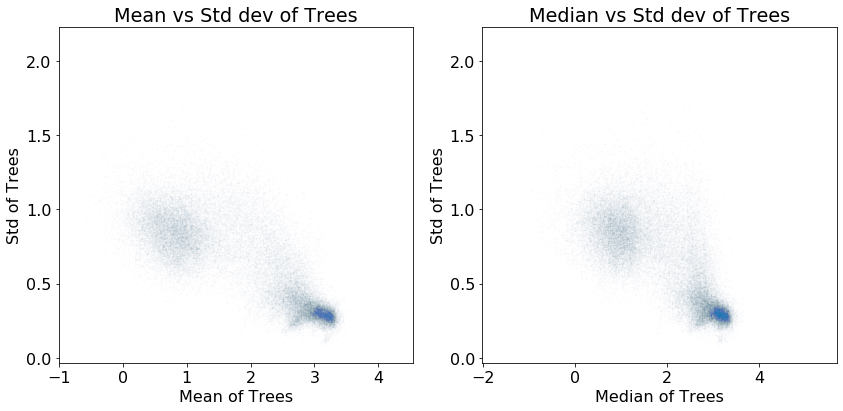

In [147]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].scatter(df_trees_sum["mean"], df_trees_sum["std"], s=1, alpha=0.01)
#sns.scatterplot(x=df_trees_sum["mean"], y=df_trees_sum["std"], size=1, hue=df_trees_sum["y_true_within_CI"], ax=ax[0,0])
#sns.scatterplot(x=df_trees_sum[df_trees_sum["y_true_within_CI"]==True]["mean"], y=df_trees_sum[df_trees_sum["y_true_within_CI"]==True]["std"], ax=ax[0,0])
ax[1].scatter(df_trees_sum["median"], df_trees_sum["std"], s=1, alpha=0.01)
#ax[1,0].scatter(df_trees_sum["median"], df_trees_sum["ci_upper"], s=1, alpha=0.01)
#ax[1,1].scatter(df_trees_sum["median"], df_trees_sum["ci_lower"], s=1, alpha=0.01)
#ax[2,0].scatter(df_trees_sum["mean"], df_trees_sum["y_true"], s=1, alpha=0.2)
ax[0].set_xlabel("Mean of Trees")
ax[1].set_xlabel("Median of Trees")
#ax[1,0].set_xlabel("Median of Trees")
#ax[1,1].set_xlabel("Median of Trees")
#ax[2,0].set_xlabel("Mean of Trees")
ax[0].set_ylabel("Std of Trees")
ax[1].set_ylabel("Std of Trees")
#ax[1,0].set_ylabel("CI Upper")
#ax[1,1].set_ylabel("CI Lower")
ax[0].set_title("Mean vs Std dev of Trees")
ax[1].set_title("Median vs Std dev of Trees")
#ax[2,0].set_ylabel("Correct Values")

plt.tight_layout()

In [134]:
#sns.jointplot("total_bill", "tip", data=tips, kind="hex")

In [204]:
res_trees[0,:]

array([ 1.6311994 ,  1.36097655,  1.58514522,  1.34025042,  1.04380405,
        2.06559613,  2.08691356,  1.36097655,  2.06559613,  1.36097655,
        2.06686276,  1.36097655,  1.36097655,  1.36097655, -0.4462871 ,
        0.98207847,  0.14842001,  1.36097655,  1.36097655,  1.36097655,
        1.5018527 ,  0.77932488, -0.08338161,  2.13534917,  1.66013103,
        1.66013103, -0.56211892,  1.36097655,  1.8809906 ,  0.77932488,
        1.16938136,  0.39877612,  1.36097655,  1.5018527 ,  1.68454538,
        1.47932923,  1.36097655,  2.2300144 ,  1.36097655, -0.77652879,
        1.29746315,  0.40546511,  1.36097655,  2.22678338,  1.36097655,
        1.97129938,  0.16551444,  1.4632554 ,  1.61342993,  1.91985947,
        1.84371921,  1.66013103,  1.36097655,  1.36097655,  1.36097655,
        0.45107562,  1.36097655,  1.43508453,  1.71559811,  1.41827741,
        2.01223279, -0.28768207,  2.11986346,  0.98207847,  1.36097655,
        1.43508453, -1.60943791,  1.6311994 ,  1.36097655, -0.59

In [136]:
#plt.bar(range(5), df_trees_res[:5])

Permuation Importance

In [96]:
result_pi_train = permutation_importance(rfr, X_train[:1000], y_train[:1000], n_repeats=10,
                                random_state=42, n_jobs=None)
sorted_idx_pi_train = result_pi_train.importances_mean.argsort()

In [97]:
result_pi_test = permutation_importance(rfr, X_test[:1000], y_test[:1000], n_repeats=10,
                                random_state=42, n_jobs=None)
sorted_idx_pi_test = result_pi_test.importances_mean.argsort()

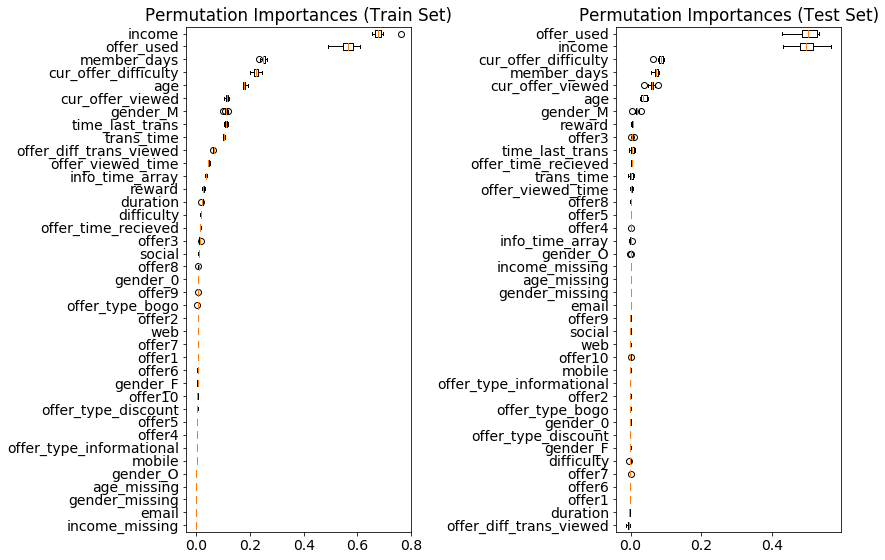

In [120]:
fig, ax = plt.subplots(1,2, figsize=(12,8))
ax[0].boxplot(result_pi_train.importances[sorted_idx_pi_train].T,
           vert=False, labels=X_test.columns[sorted_idx_pi_train])
ax[0].set_title("Permutation Importances (Train Set)")
ax[1].boxplot(result_pi_test.importances[sorted_idx_pi_test].T,
           vert=False, labels=X_test.columns[sorted_idx_pi_test])
ax[1].set_title("Permutation Importances (Test Set)")
fig.tight_layout()
plt.show()

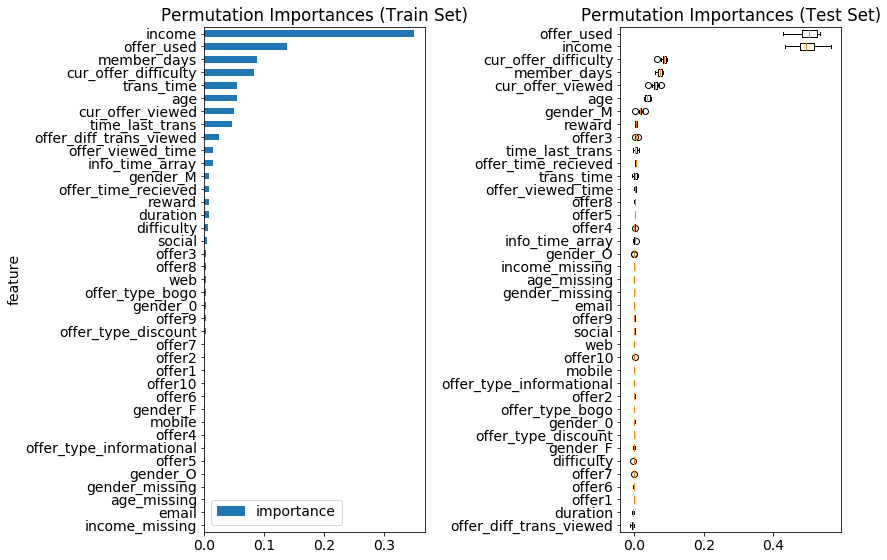

In [121]:
df_imp.set_index("feature", inplace=True)

fig, ax = plt.subplots(1,2, figsize=(12,8))
df_imp.sort_values("importance", ascending=True).plot(kind="barh", ax=ax[0])
ax[0].set_title("Feature Importances (Train Set)")
ax[1].boxplot(result_pi_test.importances[sorted_idx_pi_test].T,
           vert=False, labels=X_test.columns[sorted_idx_pi_test])
ax[1].set_title("Permutation Importances (Test Set)")
fig.tight_layout()
plt.show()

#### Hiearchacal clustering with a dendogram of features

Dendogram of the features to identify if there are possible collinear features. The features "income_missing", "age_missing", "email" and "gender_missing" all seem to be the most collinear of all the features.

In [89]:
X_test.columns

Index(['trans_time', 'offer_time_recieved', 'offer_viewed_time',
       'cur_offer_viewed', 'offer_diff_trans_viewed', 'cur_offer_difficulty',
       'info_time_array', 'offer1', 'offer2', 'offer3', 'offer4', 'offer5',
       'offer6', 'offer7', 'offer8', 'offer9', 'offer10', 'offer_used',
       'time_last_trans', 'age', 'income', 'member_days', 'reward',
       'difficulty', 'duration', 'email', 'mobile', 'social', 'web',
       'offer_type_bogo', 'offer_type_discount', 'offer_type_informational',
       'gender_missing', 'gender_0', 'gender_F', 'gender_M', 'gender_O',
       'age_missing', 'income_missing'],
      dtype='object')

In [103]:
corr_linkage

array([[25.        , 32.        ,  0.        ,  2.        ],
       [37.        , 39.        ,  0.        ,  3.        ],
       [38.        , 40.        ,  0.        ,  4.        ],
       [ 0.        ,  1.        ,  0.11686059,  2.        ],
       [ 3.        ,  4.        ,  0.4416425 ,  2.        ],
       [ 5.        , 43.        ,  0.52547505,  3.        ],
       [ 6.        , 14.        ,  0.70653129,  2.        ],
       [23.        , 24.        ,  0.74583609,  2.        ],
       [ 2.        , 44.        ,  0.79479765,  4.        ],
       [19.        , 33.        ,  0.89556248,  2.        ],
       [22.        , 29.        ,  0.94420686,  2.        ],
       [26.        , 27.        ,  1.21357741,  2.        ],
       [36.        , 41.        ,  1.28134713,  5.        ],
       [28.        , 30.        ,  1.32812204,  2.        ],
       [21.        , 51.        ,  1.35029882,  6.        ],
       [20.        , 34.        ,  1.36521719,  2.        ],
       [10.        , 17.

In [102]:
X_test.head()

,trans_time,offer_time_recieved,offer_viewed_time,cur_offer_viewed,offer_diff_trans_viewed,cur_offer_difficulty,info_time_array,offer1,offer2,offer3,offer4,offer5,offer6,offer7,offer8,offer9,offer10,offer_used,time_last_trans,age,income,member_days,reward,difficulty,duration,email,mobile,social,web,offer_type_bogo,offer_type_discount,offer_type_informational,gender_missing,gender_0,gender_F,gender_M,gender_O,age_missing,income_missing
334,510.0,504.0,210.0,1.0,300.0,10.0,210.0,1,0,0,0,0,0,0,1,0,0,0,114.0,30,43000.0,1180,5,5,168,1,1,0,1,1,0,0,0,0,0,1,0,0,0
83191,96.0,0.0,30.0,1.0,66.0,7.0,0.0,0,0,0,0,0,1,0,0,0,0,1,0.0,43,79000.0,2424,3,7,168,1,1,1,1,0,1,0,0,0,0,1,0,0,0
128293,594.0,576.0,414.0,1.0,180.0,10.0,0.0,1,0,0,0,0,0,0,0,0,0,0,84.0,118,0.0,1227,0,0,96,1,1,0,1,0,0,1,0,1,0,0,0,0,0
12236,228.0,168.0,0.0,0.0,0.0,0.0,210.0,0,0,0,0,0,0,0,1,0,0,0,42.0,61,45000.0,2496,0,0,72,1,1,1,0,0,0,1,0,0,0,1,0,0,0
108605,672.0,576.0,588.0,1.0,84.0,10.0,0.0,1,0,0,0,0,0,0,0,0,0,0,66.0,118,0.0,1056,10,10,168,1,1,1,0,1,0,0,0,1,0,0,0,0,0


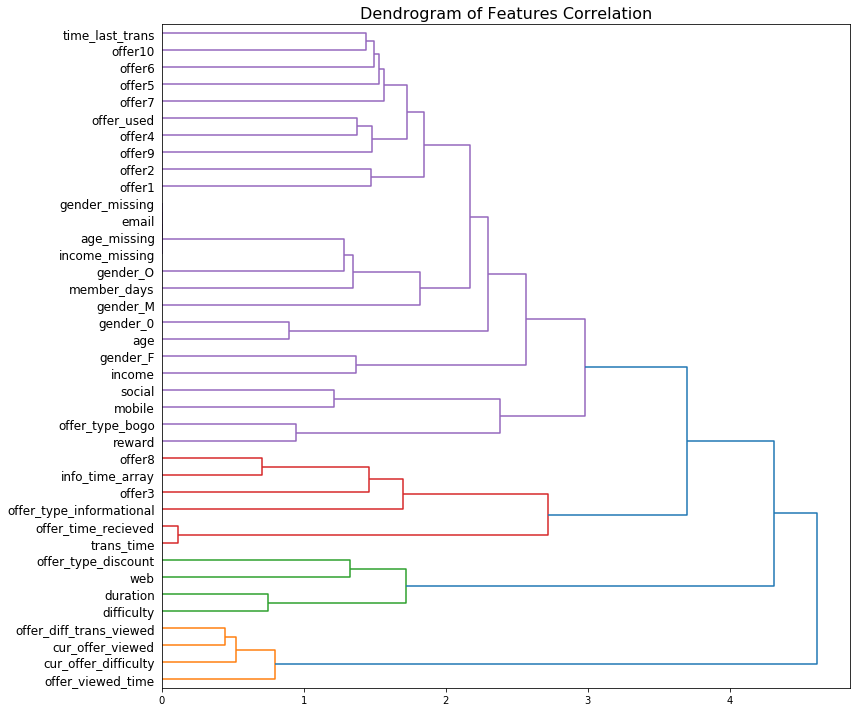

In [116]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 10))
corr = spearmanr(X_test).correlation
# convert nan to 0
corr = np.nan_to_num(corr, 0)
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(corr_linkage, labels=X_test.columns.tolist(), orientation="right", ax=ax1, leaf_rotation=0, leaf_font_size=12)
dendro_idx = np.arange(0, len(dendro['ivl']))
ax1.set_title("Dendrogram of Features Correlation", fontsize=16)
fig.tight_layout()

#### Heatmap of collineary of the features. This figure more or less confirm what we see in the above graph.

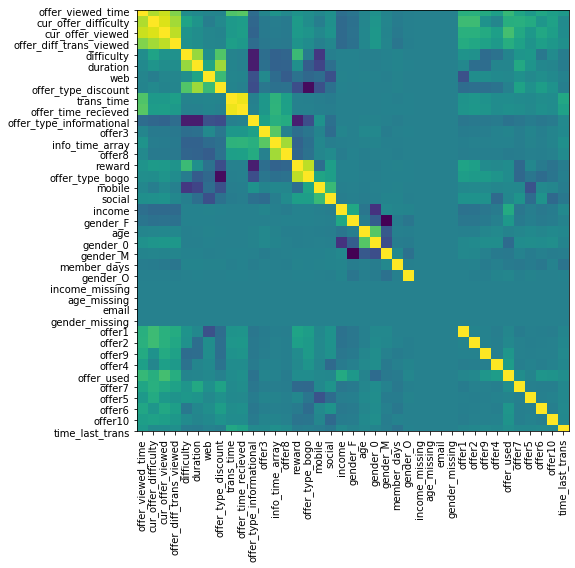

In [134]:
fig, ax2 = plt.subplots(1, 1, figsize=(12, 8))
ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()

In [82]:
!pip install shap

     |████████████████████████████████| 276kB 13.6MB/s eta 0:00:01
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394154 sha256=dbb2d7727afb71dc3b0d391b3f55cf31aeda81c32c2ddd9cea13f6ac6ce816c8
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap
You should consider upgrading via the 'pip install --upgrade pip' command.


In [150]:
from sklearn.inspection import partial_dependence

# SHAP Values
Try the SHAP package to understand more regarding the feature importance.

### Train data

In [107]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(rfr)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [108]:
# Calculate Shap values
shap_values = explainer.shap_values(X_train.sample(n=100, random_state=42))

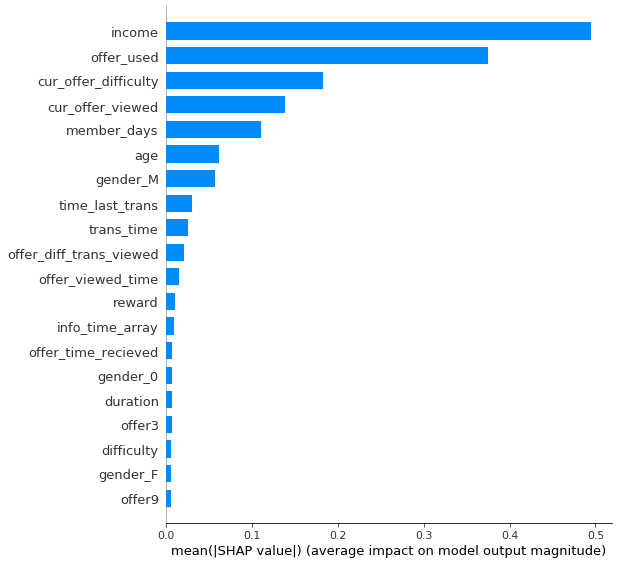

In [94]:
shap.summary_plot(shap_values, X_train.sample(n=100, random_state=42), plot_type="bar")

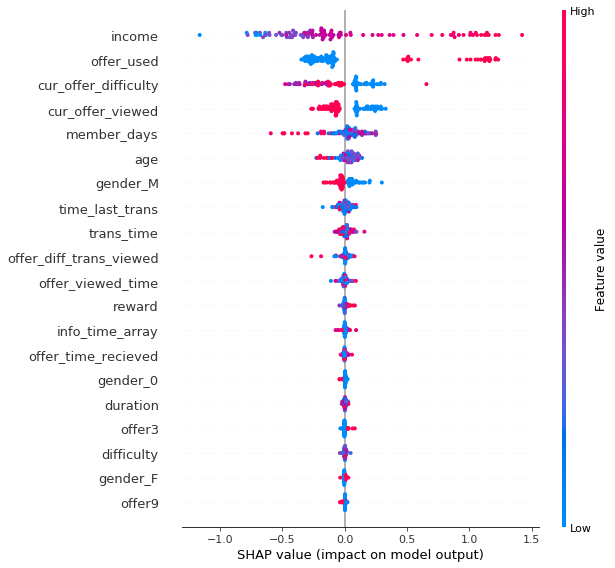

In [95]:
shap.summary_plot(shap_values, X_train.sample(n=100, random_state=42))

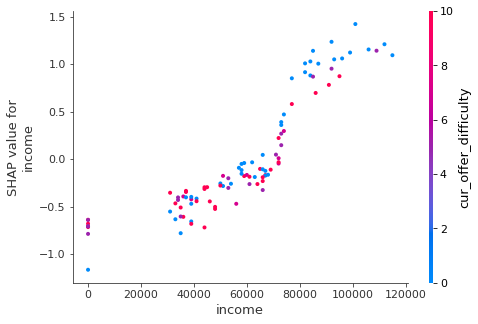

In [96]:
shap.dependence_plot("income", shap_values, X_train.sample(n=100, random_state=42))

### Test Data

In [97]:
# Calculate Shap values for test data
shap_values_test = explainer.shap_values(X_test.sample(n=100, random_state=42))

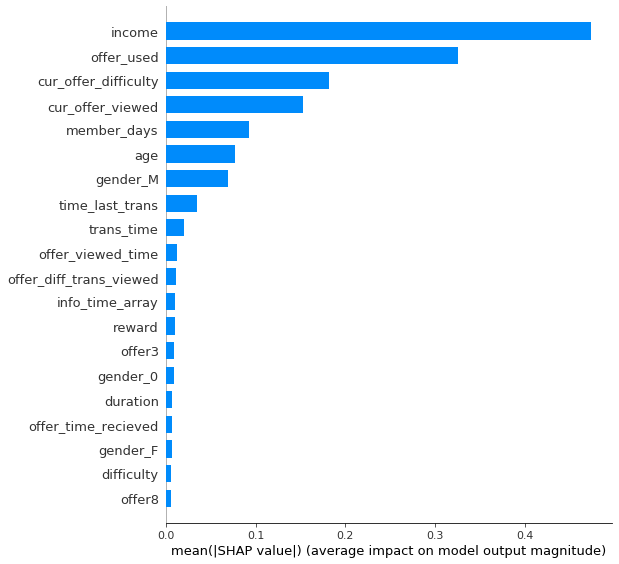

In [98]:
shap.summary_plot(shap_values_test, X_test.sample(n=100, random_state=42), plot_type="bar")

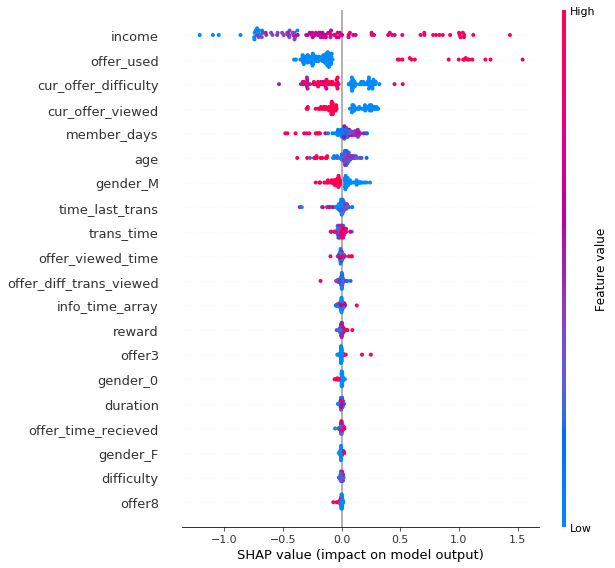

In [99]:
shap.summary_plot(shap_values_test, X_test.sample(n=100, random_state=42))

#### SHAP Depedence Plot - Global Interpretability

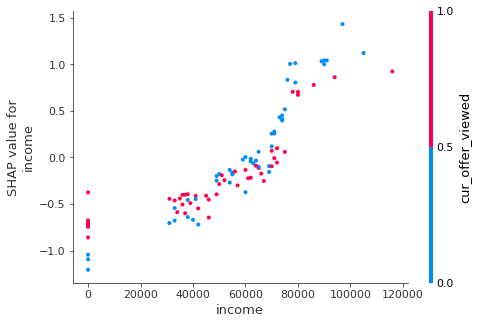

In [100]:
shap.dependence_plot("income", shap_values_test, X_test.sample(n=100, random_state=42))

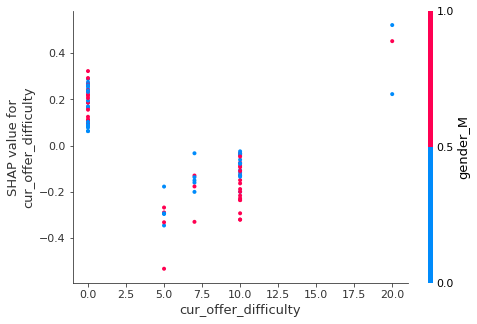

In [140]:
shap.dependence_plot("cur_offer_difficulty", shap_values_test, X_test.sample(n=100, random_state=42))

### Individual SHAP Value Plot - Local Interpretability

In [109]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(rfr)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [110]:
S = X_test[:10]

In [111]:
shap_plot(0)

In [112]:
shap_plot(1)

In [113]:
shap_plot(3)

# Working with Pipelines

### Rare label encoder
Class that hanldes rare relabeling

In [105]:
class CategoryRareCodesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.cat_cols = []
        self.threshold = threshold
        self.rare_map_dict = {}
    def fit(self, X, y=None):
        #X_copy = X.copy()
       #y_copy = y.copy()
        self.cat_cols = X.select_dtypes(include=['object', "category"]).columns
        for col in self.cat_cols:
            rare_map = {k:(k if v > self.threshold else "rare") for k,v in X[col].value_counts(normalize=True).items()}
            self.rare_map_dict[col] = rare_map
        return self
    def transform(self, X, y=None):
        # create a copy to avoid overwriting original data
        #X_copy = X.copy()
        #y_copy = y.copy()
        # loop through all category columns
        for col in self.cat_cols:
            # relabel category values, for new labels that are not in the dictionary set them to rare, and dont change NaNs
            #X_copy[col] = X_copy[col].apply(lambda x: self.rare_map_dict[col][x] if x in self.rare_map_dict[col] else ("rare" if pd.notna(x) else x))
            X[col] = X[col].apply(lambda x: self.rare_map_dict[col][x] if x in self.rare_map_dict[col] else ("rare" if pd.notna(x) else x))
        #return X_copy
        return X

### Class to handle NaNs for categorical data
Class for category encoding inheriting from BaseEstimator and TransformerMixin. This class is needed in order to convert string datatypes to categorical and numbers, and then convert back the NaN code value to NaN again.  
This is needed if one wants to compute more sophistacated imputations with sklearn such as IterativeImputer as these require numeric data type and not strings.

In [106]:
class CategoryCodesNanTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cat_cols = []
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        #self.cat_cols = [col for col in X.columns if X[col].dtype == "O"]
        self.cat_cols = X.select_dtypes(include=['object', "category"]).columns
        for col in self.cat_cols:
            # change data type and get values
            X[col] = X[col].astype("category").cat.codes
            # convert back to NaN to be able to impute
            X.loc[X[col]==-1, col] = np.NaN
        return X
                        
                         
                                

### sklearn imputers for categorical data. 
As the IterativeImputer and KNNImputer can not handle categorical data these two classes had to be modified to handle categorical data.  
Class that inherits from IterativeImputer but in order to handle categorical variables with NaN we need to round the number in order to use categorical encoders.

IterativeComputerForCategory

In [107]:
class IterativeImputerCategory(IterativeImputer):
    def transform(self, X):
        result = super().transform(X)
        return np.round(result)
    def fit_transform(self,X, y=None):
        result = super().fit_transform(X, y=None)
        return np.round(result)
    

KNNImputer For Category

In [108]:
class KNNImputerCategory(KNNImputer):
    def transform(self, X):
        result = super().transform(X)
        return np.round(result)
    def fit_transform(self,X, y=None):
        result = super().fit_transform(X, y=None)
        return np.round(result)

Pipelines and lists of methods to be used.

In [128]:
# imputer pipelines category list
cat_imputers_list = [SimpleImputer(strategy="most_frequent")]#, KNNImputerCategory(), IterativeImputerCategory()]
# numerical imputers list, put straight into a transformer
num_imputers_list = [SimpleImputer(strategy="median")]#, SimpleImputer(strategy="mean"), KNNImputer(),
                     #IterativeImputer(random_state=42)]

# missing indicator
missing_indicator = Pipeline(steps=[
    ("missing_ind", MissingIndicator())
])
# encoders
encoders_mix = [OrdinalEncoder(), OneHotEncoder(handle_unknown='ignore', sparse=False), ce.cat_boost.CatBoostEncoder(),
                ce.helmert.HelmertEncoder(), ce.target_encoder.TargetEncoder(),
           ce.james_stein.JamesSteinEncoder(), ce.sum_coding.SumEncoder(), ce.m_estimate.MEstimateEncoder(),
            ce.leave_one_out.LeaveOneOutEncoder(), ce.hashing.HashingEncoder(), ce.glmm.GLMMEncoder(), 
            ce.basen.BaseNEncoder(), ce.backward_difference.BackwardDifferenceEncoder()]
# Regressors
regressor_list = [RandomForestRegressor()]#, LinearRegression(), SVR()]
# scalers
scaler_list = [Normalizer(), StandardScaler()]
# percentage cut off for rare relabeling
threshold_list = [0.001, 0.005, 0.1, 0.2]

Function for preprocessing and modelling

In [129]:
#X.sample(n=5000, random_state=42)

In [135]:
def prepare_and_model(cat_imputer, num_imputer, encoder, regressor, threshold, scaler):
    '''
    Function that construct a complete pipeline to handle the whole machine learning workflow from imputing nans, encoding 
    categorical data, normalizing, fitting and predicting.
    Parameters:
        cat_imputer: Method to impute categorical nans.
        num_imputer: Method to impute numerical nans.
        encoder: Encoder to encode categorical values.
        regressor: Regression model.
    Return:
        r2_train: R2 metric for train data.
        r2_valid: R2 metric for vailidation data.
    
    '''
    df_temp = pd.concat([X, y], axis=1)
    df_temp = df_temp.sample(n=5000, random_state=42)
    X2 = df_temp.drop("trans_amount", axis=1)
    y2 = df_temp["trans_amount"]

    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
    #cat_cols = [col for col in X.columns if X[col].dtype=="O"]
    #num_cols = [col for col in X.columns if X[col].dtype!="O"]
    cat_cols = X.select_dtypes(include=["category", "object"]).columns
    num_cols = X.select_dtypes(exclude=["category", "object"]).columns
    #print(num_cols)
    # numerical pipeline
    num_impute_pipe = Pipeline(steps=[
        ('num_imputer', num_imputer),
        ('normalzie', Normalizer())
    ])
    # categorical pipeline
    cat_impute_pipe = Pipeline(steps=[
        ('cat_rare_relabel', CategoryRareCodesTransformer(threshold)),
        ('cat_codes_nans', CategoryCodesNanTransformer()),
        ('imputer', cat_imputer),
        ('encoder', encoder),
        ('Normalize', scaler)
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('miss_ind', missing_indicator, X.columns),
            ('num_impute', num_impute_pipe, num_cols),
            ("cat_impute", cat_impute_pipe, cat_cols),
    ])
    
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ('regressor', regressor)
    ])
    #pdb.set_trace()
    pipeline.fit(X_train, y_train)
    #display(pipeline.transform(X_train))
    #display(pipeline.transform(X_test))
    y_train_predict = pipeline.predict(X_train)
    y_test_predict = pipeline.predict(X_test)
    r2_train = r2_score(y_train, y_train_predict) 
    r2_valid = r2_score(y_test, y_test_predict)
    return r2_train, r2_valid 
    #print("Train R2 score: %.3f" % r2_score(y_train, y_train_predict))
    #print("Test R2 score: %.3f" % r2_score(y_test, y_test_predict))

Loop to iterate through all of the different combnations. Results will be dumped to a csv file.

In [136]:
col_names = ["cat_imputer", "num_imputer", "encoder", "regressor", "scaler", "rare_threshold", "r2_train", "r2_valid"]
res_df = pd.DataFrame(columns=col_names)
for encoder in tqdm(encoders_mix):
    for cat_imputer in cat_imputers_list:
        for num_imputer in num_imputers_list:
            for regressor in regressor_list:
                for scaler in scaler_list:
                    for threshold in threshold_list:
                    
                        #print(cat_imputer)
                        #print(num_imputer)
                        #print(encoder)
                        #print(regressor)
                        r2_train, r2_valid = prepare_and_model(cat_imputer, num_imputer, encoder, regressor, threshold, scaler)
                        #pdb.set_trace()
                        res_list = [type(cat_imputer).__name__, type(num_imputer).__name__, type(encoder).__name__,
                                    type(regressor).__name__, type(scaler).__name__, threshold, r2_train, r2_valid]
                        temp_df = pd.DataFrame.from_records([res_list], columns=col_names)
                        res_df = pd.concat([res_df, temp_df], axis=0)
                        res_df.to_csv("res.csv")
                        #display(res_df)

100%|██████████| 13/13 [09:30<00:00, 43.89s/it]


Import results from loop test

In [114]:
df_res = pd.read_csv("res.csv")

In [115]:
df_res.shape

(104, 9)

In [118]:
df_res.sort_values("r2_valid", ascending=False)

,Unnamed: 0,cat_imputer,num_imputer,encoder,regressor,scaler,rare_threshold,r2_train,r2_valid
1,0,SimpleImputer,SimpleImputer,OrdinalEncoder,RandomForestRegressor,Normalizer,0.005,0.943626,0.590386
41,0,SimpleImputer,SimpleImputer,JamesSteinEncoder,RandomForestRegressor,Normalizer,0.005,0.944604,0.589252
79,0,SimpleImputer,SimpleImputer,HashingEncoder,RandomForestRegressor,StandardScaler,0.200,0.944040,0.587655
50,0,SimpleImputer,SimpleImputer,SumEncoder,RandomForestRegressor,Normalizer,0.100,0.943998,0.587244
0,0,SimpleImputer,SimpleImputer,OrdinalEncoder,RandomForestRegressor,Normalizer,0.001,0.944606,0.587052
42,0,SimpleImputer,SimpleImputer,JamesSteinEncoder,RandomForestRegressor,Normalizer,0.100,0.944109,0.586892
11,0,SimpleImputer,SimpleImputer,OneHotEncoder,RandomForestRegressor,Normalizer,0.200,0.944380,0.586868
13,0,SimpleImputer,SimpleImputer,OneHotEncoder,RandomForestRegressor,StandardScaler,0.005,0.944693,0.586578
94,0,SimpleImputer,SimpleImputer,BaseNEncoder,RandomForestRegressor,StandardScaler,0.100,0.943909,0.586517
83,0,SimpleImputer,SimpleImputer,GLMMEncoder,RandomForestRegressor,Normalizer,0.200,0.944019,0.586279


Looking at the results there is no huge difference between the different results. If this was a kaggle compeition this might be worth spending more time on. However, for this project we will just continue using default values.

In [149]:
df_res.loc[(df_res["scaler"]=="Normalizer")].sort_values(["encoder", "r2_valid"], ascending=False)

,Unnamed: 0,cat_imputer,num_imputer,encoder,regressor,scaler,rare_threshold,r2_train,r2_valid
34,0,SimpleImputer,SimpleImputer,TargetEncoder,RandomForestRegressor,Normalizer,0.100,0.944376,0.583385
32,0,SimpleImputer,SimpleImputer,TargetEncoder,RandomForestRegressor,Normalizer,0.001,0.944063,0.582559
33,0,SimpleImputer,SimpleImputer,TargetEncoder,RandomForestRegressor,Normalizer,0.005,0.944517,0.580353
35,0,SimpleImputer,SimpleImputer,TargetEncoder,RandomForestRegressor,Normalizer,0.200,0.944476,0.578415
50,0,SimpleImputer,SimpleImputer,SumEncoder,RandomForestRegressor,Normalizer,0.100,0.943998,0.587244
48,0,SimpleImputer,SimpleImputer,SumEncoder,RandomForestRegressor,Normalizer,0.001,0.944748,0.579973
51,0,SimpleImputer,SimpleImputer,SumEncoder,RandomForestRegressor,Normalizer,0.200,0.944278,0.579563
49,0,SimpleImputer,SimpleImputer,SumEncoder,RandomForestRegressor,Normalizer,0.005,0.944083,0.575680
1,0,SimpleImputer,SimpleImputer,OrdinalEncoder,RandomForestRegressor,Normalizer,0.005,0.943626,0.590386
0,0,SimpleImputer,SimpleImputer,OrdinalEncoder,RandomForestRegressor,Normalizer,0.001,0.944606,0.587052
